In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('Final2_gurgaon_properties_cleaned.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others room,furnishing_type,luxury_score,area_room_ratio
0,flat,signature global park 4,sector 36,0.82,7586.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,1,8,360.333333
1,flat,smart world gems,sector 89,0.95,8597.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,1,38,552.500000
2,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,1,49,292.500000
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,0,2,174,665.000000
4,flat,suncity avenue,sector 102,0.48,9023.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,5.0,North-East,Relatively New,632.0,NaN,532.0,0,0,1,0,0,1,159,266.000000


In [5]:
df.shape

(3555, 24)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3555 entries, 0 to 3554
Data columns (total 24 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3555 non-null   object 
 1   society              3554 non-null   object 
 2   sector               3555 non-null   object 
 3   price                3555 non-null   float64
 4   price_per_sqft       3555 non-null   float64
 5   area                 3555 non-null   float64
 6   areaWithType         3555 non-null   object 
 7   bedRoom              3555 non-null   int64  
 8   bathroom             3555 non-null   int64  
 9   balcony              3555 non-null   object 
 10  floorNum             3538 non-null   float64
 11  facing               2544 non-null   object 
 12  agePossession        3555 non-null   object 
 13  super_built_up_area  1875 non-null   float64
 14  built_up_area        1114 non-null   float64
 15  carpet_area          1840 non-null   f

In [7]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          2441
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others room               0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

# built_up_area

<Axes: xlabel='built_up_area', ylabel='super_built_up_area'>

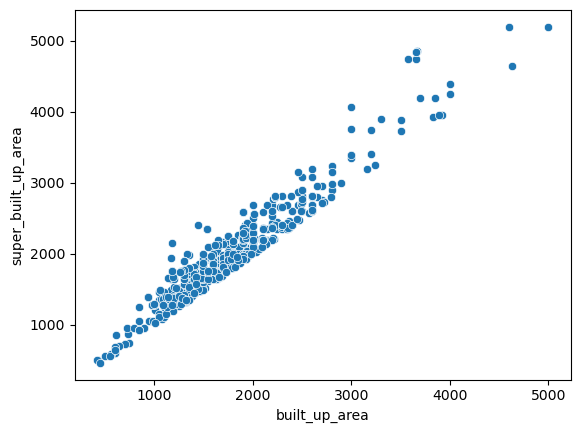

In [8]:
# strong relationship 
sns.scatterplot(x = df['built_up_area'], y = df['super_built_up_area'])

<Axes: xlabel='built_up_area', ylabel='carpet_area'>

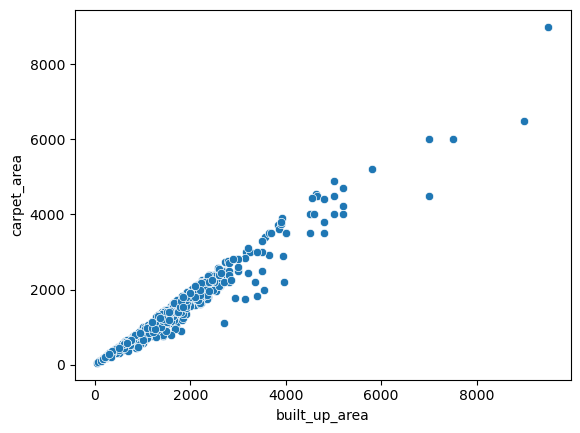

In [9]:
sns.scatterplot(x = df['built_up_area'], y = df['carpet_area'])

In [10]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3550    False
3551     True
3552    False
3553     True
3554    False
Length: 3555, dtype: bool

In [11]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [12]:
super_built_up_area_ratio = (all_present_df['super_built_up_area'] / all_present_df['built_up_area']).median()

In [13]:
carpet_to_built_up_area_ratio = (all_present_df['carpet_area'] / all_present_df['built_up_area']).median()

In [14]:
print(super_built_up_area_ratio, carpet_to_built_up_area_ratio)

1.105263157894737 0.9


In [15]:
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area'] / 1.105) + (sbc_df['carpet_area'] / 0.9))/2), inplace = True)

C:\Users\parth\AppData\Local\Temp\ipykernel_5152\1903227928.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area'] / 1.105) + (sbc_df['carpet_area'] / 0.9))/2), inplace = True)
C:\Users\parth\AppData\Local\Temp\ipykernel_5152\1903227928.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus

In [17]:
df.update(sbc_df)

In [18]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          2020
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others room               0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [19]:
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [20]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area'] / 1.105), inplace = True)

C:\Users\parth\AppData\Local\Temp\ipykernel_5152\1992652892.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area'] / 1.105), inplace = True)
C:\Users\parth\AppData\Local\Temp\ipykernel_5152\1992652892.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sb_df['built_up_area'].fillna(

In [21]:
df.update(sb_df)

In [22]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area          1145
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others room               0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [23]:
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [24]:
c_df['built_up_area'].fillna(round(c_df['carpet_area'] / 0.9), inplace = True)

C:\Users\parth\AppData\Local\Temp\ipykernel_5152\1043883308.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  c_df['built_up_area'].fillna(round(c_df['carpet_area'] / 0.9), inplace = True)
C:\Users\parth\AppData\Local\Temp\ipykernel_5152\1043883308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c_df['built_up_area'].fillna(round(c_df['c

In [25]:
df.update(c_df)

In [26]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1011
agePossession             0
super_built_up_area    1680
built_up_area           473
carpet_area            1715
study room                0
servant room              0
store room                0
pooja room                0
others room               0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [27]:
null_index = df[df['built_up_area'].isnull()].index

In [28]:
df = df.drop(index=null_index)

In [29]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                  6
facing                  904
agePossession             0
super_built_up_area    1207
built_up_area             0
carpet_area            1242
study room                0
servant room              0
store room                0
pooja room                0
others room               0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<Axes: xlabel='built_up_area', ylabel='price'>

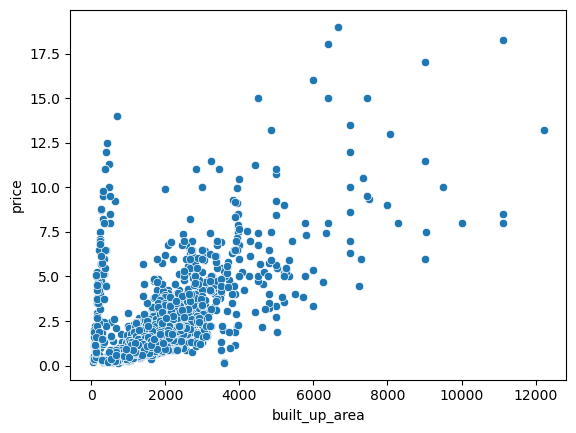

In [30]:
sns.scatterplot(x = df['built_up_area'], y = df['price'])

In [31]:
anomly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [40]:
anomly_df.sample(5)

,price,area,built_up_area
2411,3.50,1440.0,1440.0
1940,4.85,1875.0,1875.0
3387,3.50,1350.0,1350.0
2726,8.00,3132.0,3132.0
1821,3.45,1869.0,1869.0


In [32]:
anomly_df['built_up_area'] = anomly_df['area']

In [41]:
df.update(anomly_df)

<Axes: xlabel='built_up_area', ylabel='price'>

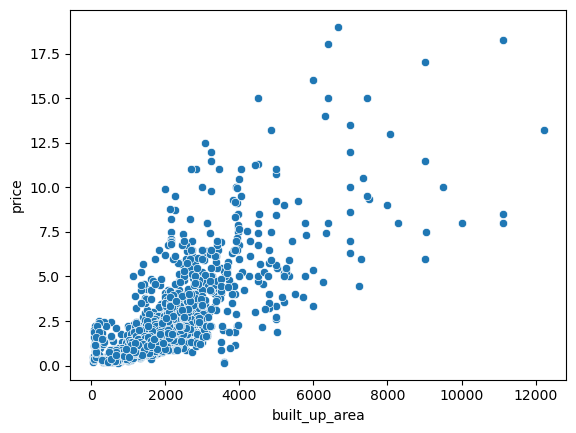

In [42]:
sns.scatterplot(x = df['built_up_area'], y = df['price'])

In [43]:
df.drop(columns = ['area', 'areaWithType', 'super_built_up_area', 'carpet_area', 'area_room_ratio'],inplace = True)

In [44]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others room,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7586.0,3,2,2,2.0,NaN,New Property,850.0,0,0,0,0,0,1,8
1,flat,smart world gems,sector 89,0.95,8597.0,2,2,2,4.0,NaN,New Property,1226.0,1,1,0,0,0,1,38
2,flat,breez global hill view,sohna road,0.32,5470.0,2,2,1,17.0,NaN,New Property,1000.0,0,0,0,0,0,1,49
3,flat,bestech park view sanskruti,sector 92,1.60,8020.0,3,4,3+,10.0,North-West,Relatively New,1615.0,0,1,0,0,0,2,174
4,flat,suncity avenue,sector 102,0.48,9023.0,2,2,1,5.0,North-East,Relatively New,582.0,0,0,1,0,0,1,159


In [45]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             6
facing             904
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others room          0
furnishing_type      0
luxury_score         0
dtype: int64

# floorNum

In [46]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others room,furnishing_type,luxury_score
1294,house,independent,sector 3,1.50,10288.0,3,3,0,NaN,NaN,Undefined,210.0,0,0,0,0,0,1,0
1946,house,jacob pura,sector 12,0.35,9722.0,2,1,0,NaN,NaN,Undefined,360.0,0,0,0,0,0,1,0
2271,house,emaar mgf marbella,sector 66,9.00,21251.0,4,4,3+,NaN,South-West,Relatively New,5200.0,0,1,1,1,0,2,114
2439,house,dlf new town heights,sector 86,2.47,7719.0,4,4,3+,NaN,West,Moderately Old,2800.0,0,1,0,1,0,2,130
2536,flat,NaN,sector 78,0.60,3692.0,2,2,0,NaN,NaN,Under Construction,1625.0,0,0,0,0,0,1,0
3214,flat,experion heartsong,dwarka expressway,1.08,6150.0,3,3,0,NaN,NaN,Under Construction,1758.0,0,0,0,0,0,1,0


In [47]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [48]:
df['floorNum'].fillna(2.0, inplace = True)

C:\Users\parth\AppData\Local\Temp\ipykernel_5152\3175433704.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['floorNum'].fillna(2.0, inplace = True)


In [49]:
df.isnull().sum()

property_type        0
society              1
sector               0
price                0
price_per_sqft       0
bedRoom              0
bathroom             0
balcony              0
floorNum             0
facing             904
agePossession        0
built_up_area        0
study room           0
servant room         0
store room           0
pooja room           0
others room          0
furnishing_type      0
luxury_score         0
dtype: int64

# facing 

<Axes: ylabel='count'>

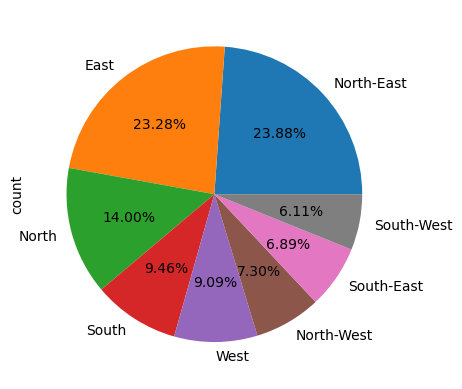

In [50]:
df['facing'].value_counts().plot(kind = 'pie', autopct = '%0.2f%%')

In [51]:
df.drop(columns = ['facing'], inplace = True)

In [52]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others room,furnishing_type,luxury_score
155,flat,godrej icon,sector 88a,1.65,9041.0,3,3,3,12.0,New Property,1652.0,0,0,0,0,0,1,60
2643,flat,parkwood westend,sector 92,0.70,5204.0,2,2,3,5.0,Under Construction,1217.0,1,0,0,0,0,1,0
3321,flat,la vida by tata housing,sector 113,3.72,13985.0,5,4,3+,0.0,New Property,2956.0,0,0,0,1,0,0,44
3531,flat,dlf new town heights,sector 86,1.26,6114.0,3,3,3,5.0,Moderately Old,1747.0,0,1,0,0,0,1,113
1139,flat,emaar mgf the palm drive,sector 66,3.20,17778.0,3,3,3,12.0,Relatively New,1800.0,1,1,1,1,0,1,117


In [53]:
df.isnull().sum()

property_type      0
society            1
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others room        0
furnishing_type    0
luxury_score       0
dtype: int64

# society

In [54]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others room,furnishing_type,luxury_score
2536,flat,NaN,sector 78,0.6,3692.0,2,2,0,2.0,Under Construction,1625.0,0,0,0,0,0,1,0


In [55]:
df.drop(index = [2536], inplace = True)

In [56]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others room        0
furnishing_type    0
luxury_score       0
dtype: int64

# agePossession

In [57]:
df['agePossession'].value_counts()

agePossession
Relatively New        1494
New Property           486
Undefined              467
Moderately Old         380
Under Construction     254
Name: count, dtype: int64

In [58]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others room,furnishing_type,luxury_score
10,house,independent,sector 109,1.55,6568.0,3,2,0,1.0,Undefined,2360.0,0,0,0,0,0,1,0
19,flat,afnhb jalvayu vihar,sector 30,0.85,12859.0,2,2,1,2.0,Undefined,734.0,0,0,0,0,0,2,49
25,flat,chanderlok society,sector 28,0.90,7235.0,4,2,3+,1.0,Undefined,1382.0,0,0,0,0,0,1,0
33,house,greenopolis,sector 89,0.70,5397.0,2,2,2,14.0,Undefined,1297.0,0,0,0,0,0,1,0
48,flat,smart world gems,sector 89,1.71,12000.0,3,2,0,3.0,Undefined,1423.0,0,0,0,0,0,1,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3508,house,independent,sector 21,0.45,8411.0,3,2,1,1.0,Undefined,594.0,0,0,0,0,0,1,0
3511,flat,kiran residency,sector 56,1.55,7750.0,3,3,3+,5.0,Undefined,1800.0,0,1,0,1,0,1,166
3520,flat,sidhartha ncr one,sector 95,0.57,4179.0,2,2,2,10.0,Undefined,1364.0,0,0,0,0,0,1,0
3540,flat,vipul belmonte,sector 53,6.50,21922.0,3,4,3+,0.0,Undefined,2683.0,1,0,0,0,0,1,72


In [59]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()

        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [60]:
df['agePossession'] = df.apply(mode_based_imputation, axis = 1)

In [61]:
df['agePossession'].value_counts()

agePossession
Relatively New        1620
New Property           522
Moderately Old         436
Under Construction     290
Undefined              213
Name: count, dtype: int64

In [62]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()

        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [63]:
df['agePossession'] = df.apply(mode_based_imputation2, axis = 1)

In [64]:
df['agePossession'].value_counts()

agePossession
Relatively New        1656
New Property           529
Moderately Old         467
Under Construction     291
Undefined              138
Name: count, dtype: int64

In [65]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()

        if not mode_value.empty:
            return mode_value.iloc[0]
        else:
            return np.nan
    else:
        return row['agePossession']

In [66]:
df['agePossession'] = df.apply(mode_based_imputation3, axis = 1)

In [67]:
df['agePossession'].value_counts()

agePossession
Relatively New        1794
New Property           529
Moderately Old         467
Under Construction     291
Name: count, dtype: int64

In [68]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others room        0
furnishing_type    0
luxury_score       0
dtype: int64

In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3081 entries, 0 to 3554
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   property_type    3081 non-null   object 
 1   society          3081 non-null   object 
 2   sector           3081 non-null   object 
 3   price            3081 non-null   float64
 4   price_per_sqft   3081 non-null   float64
 5   bedRoom          3081 non-null   int64  
 6   bathroom         3081 non-null   int64  
 7   balcony          3081 non-null   object 
 8   floorNum         3081 non-null   float64
 9   agePossession    3081 non-null   object 
 10  built_up_area    3081 non-null   float64
 11  study room       3081 non-null   int64  
 12  servant room     3081 non-null   int64  
 13  store room       3081 non-null   int64  
 14  pooja room       3081 non-null   int64  
 15  others room      3081 non-null   int64  
 16  furnishing_type  3081 non-null   int64  
 17  luxury_score     30

In [70]:
df.to_csv('Final3_gurgaon_properties_cleaned.csv', index = False)